In [1]:
import pandas as pd
import math
import datetime
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression as linreg

## Start here

First, load each data set as a Pandas dataframe.

In [2]:
cab_data = pd.read_csv("Cab_Data.csv", index_col="Transaction ID")
cab_data

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
Transaction ID,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...
10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500


In [3]:
city_data = pd.read_csv("City.csv", index_col="City")
city_data["Population"] = city_data["Population"].str.replace(',', '').astype(int)
city_data["Users"] = city_data["Users"].str.replace(',', '').astype(int)
city_data

# Note: The population and users columns data are stored as strings not integers so must remove commas then convert to int

,Population,Users
City,,
NEW YORK NY,8405837,302149
CHICAGO IL,1955130,164468
LOS ANGELES CA,1595037,144132
MIAMI FL,1339155,17675
SILICON VALLEY,1177609,27247
ORANGE COUNTY,1030185,12994
SAN DIEGO CA,959307,69995
PHOENIX AZ,943999,6133
DALLAS TX,942908,22157


In [4]:
customer_data = pd.read_csv("Customer_ID.csv", index_col="Customer ID")
customer_data

,Gender,Age,Income (USD/Month)
Customer ID,,,
29290,Male,28,10813
27703,Male,27,9237
28712,Male,53,11242
28020,Male,23,23327
27182,Male,33,8536
...,...,...,...
12490,Male,33,18713
14971,Male,30,15346
41414,Male,38,3960


In [5]:
transaction_data = pd.read_csv("Transaction_ID.csv", index_col="Transaction ID")
transaction_data

,Customer ID,Payment_Mode
Transaction ID,,
10000011,29290,Card
10000012,27703,Card
10000013,28712,Cash
10000014,28020,Cash
10000015,27182,Card
...,...,...
10440104,53286,Cash
10440105,52265,Cash
10440106,52175,Card


By using the commands below to convert the pandas dataframe into a readable date, we know that the date range lies between 2016-01-02 and 2018-12-31.

In [6]:
pd.to_datetime(cab_data["Date of Travel"].min(), unit="d", origin='1899-12-30')

Timestamp('2016-01-02 00:00:00')

In [7]:
pd.to_datetime(cab_data["Date of Travel"].max(), unit="d", origin='1899-12-30')

Timestamp('2018-12-31 00:00:00')

In the next two commands we add two columns:
* The first column changes the dates into readable format.
* The second column calculates the profit or loss made from each trip.

In [8]:
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"], unit="d", origin='1899-12-30')
cab_data["Profit Generated"] = cab_data["Price Charged"] - cab_data["Cost of Trip"]

Here we merge the `cab_data` and `transaction_data` dataframes to add customer ID and payment mode information to the cab_data.

In [9]:
cab_data = transaction_data.join(cab_data)

cab_data

,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Generated
Transaction ID,,,,,,,,,
10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...,...
10440104,53286,Cash,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
10440105,52265,Cash,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
10440106,52175,Card,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


## Profit per trip in different cities

Here we investigate which cities have a higher (on average) profit generated per trip, and which taxi company generates more profit per trip in each city.

In [10]:
grouped_cab_data = cab_data.groupby(["City", "Company"])["KM Travelled", "Price Charged", "Cost of Trip", "Profit Generated"]

grouped_cab_data_summary = grouped_cab_data.mean()

grouped_cab_data_summary

C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\95551396.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_cab_data = cab_data.groupby(["City", "Company"])["KM Travelled", "Price Charged", "Cost of Trip", "Profit Generated"]


KM Travelled  Price Charged  Cost of Trip  \
City           Company                                                 
ATLANTA GA     Pink Cab       22.539824     302.131555    247.619594   
               Yellow Cab     22.248247     422.413446    293.615723   
AUSTIN TX      Pink Cab       21.969176     320.435070    241.502901   
               Yellow Cab     22.512840     422.248940    296.999358   
BOSTON MA      Pink Cab       22.740746     300.551489    250.030529   
               Yellow Cab     22.543649     359.140431    297.656812   
CHICAGO IL     Pink Cab       22.511070     281.613731    247.565821   
               Yellow Cab     22.659493     364.021927    299.097441   
DALLAS TX      Pink Cab       22.021203     260.025652    242.105281   
               Yellow Cab     22.599395     493.807790    297.958374   
DENVER CO      Pink Cab       22.459218     276.202453    247.088437   
               Yellow Cab     22.444097     443.235413    296.382238   
LOS ANGELES CA Pink Cab       22.635629     305.624252    248.955132   
               Yellow Cab     22.688117     416.231136    299.574768   
MIAMI FL       Pink Cab       22.299925     326.006309    244.936783   
               Yellow Cab     22.635606     432.944872    299.072443   
NASHVILLE TN   Pink Cab       22.528066     282.062493    247.144224   
               Yellow Cab     22.968837     376.245577    303.321981   
NEW YORK NY    Pink Cab       22.622415     357.074129    248.856589   
               Yellow Cab     22.496362     604.841911    296.977659   
ORANGE COUNTY  Pink Cab       22.213153     312.026874    244.613898   
               Yellow Cab     22.364597     438.548623    294.763268   
PHOENIX AZ     Pink Cab       21.747384     280.321458    239.121928   
               Yellow Cab     22.529450     428.737417    297.617010   
PITTSBURGH PA  Pink Cab       22.581613     273.879355    248.794695   
               Yellow Cab     22.670523     405.313661    297.455945   
SACRAMENTO CA  Pink Cab       22.604303     290.110810    248.638537   
               Yellow Cab     22.949719     362.637106    302.615634   
SAN DIEGO CA   Pink Cab       22.554710     307.938193    248.165914   
               Yellow Cab     22.391995     392.223328    295.516553   
SEATTLE WA     Pink Cab       22.694133     291.223898    249.942297   
               Yellow Cab     22.583783     391.014733    297.585765   
SILICON VALLEY Pink Cab       22.791838     340.377008    250.766650   
               Yellow Cab     22.696391     506.499502    299.711120   
TUCSON AZ      Pink Cab       22.556909     323.213554    249.008830   
               Yellow Cab     22.267527     366.018224    294.488966   
WASHINGTON DC  Pink Cab       22.480756     299.974561    247.491800   
               Yellow Cab     22.625514     381.051261    298.666349   

                           Profit Generated  
City           Company                       
ATLANTA GA     Pink Cab           54.511961  
               Yellow Cab        128.797723  
AUSTIN TX      Pink Cab           78.932168  
               Yellow Cab        125.249582  
BOSTON MA      Pink Cab           50.520960  
               Yellow Cab         61.483619  
CHICAGO IL     Pink Cab           34.047910  
               Yellow Cab         64.924486  
DALLAS TX      Pink Cab           17.920371  
               Yellow Cab        195.849415  
DENVER CO      Pink Cab           29.114016  
               Yellow Cab        146.853175  
LOS ANGELES CA Pink Cab           56.669120  
               Yellow Cab        116.656368  
MIAMI FL       Pink Cab           81.069526  
               Yellow Cab        133.872429  
NASHVILLE TN   Pink Cab           34.918269  
               Yellow Cab         72.923597  
NEW YORK NY    Pink Cab          108.217540  
               Yellow Cab        307.864252  
ORANGE COUNTY  Pink Cab           67.412976  
               Yellow Cab        143.785355  
PHOENIX AZ     Pink Cab           41.19953

From this it is clear that in nearly all cities, the Yellow Cab company generates **more profit per trip** compared to the Pink Cab company. The one exception is in Tucson, AZ, and evem then, the average profit per trip is not much less for Yellow Cab compared to Pink Cab. We shall make a plot to visualize the data:

<AxesSubplot:xlabel='City'>

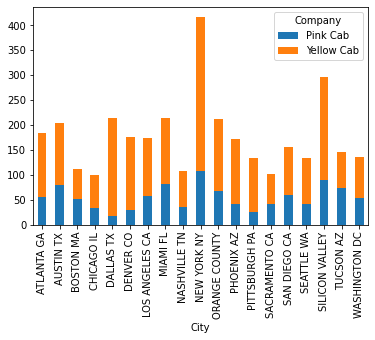

In [11]:
grouped_cab_data_summary["Profit Generated"].unstack().plot.bar(stacked=True)

The top 3 cities in which Yellow Cab is the most profitable are **Dallas, New York, and Silicon Valley**. For Pink Cab, the top 3 cities are **Miami, New York, and Silicon Valley**.

## Trip share by city

What is the difference in the number of trips made by each company between cities?

In [12]:
cab_data["Trips"] = 1
cab_data["Yellow Cab Trips"] = cab_data["Company"].map(lambda company: 1 if company == "Yellow Cab" else 0)
cab_data["Pink Cab Trips"] = cab_data["Company"].map(lambda company: 1 if company == "Pink Cab" else 0)

grouped_cab_data_counts = cab_data.groupby("City")["Yellow Cab Trips", "Pink Cab Trips", "Trips"].sum()

grouped_cab_data_counts["Share of Yellow Cab Trips"] = grouped_cab_data_counts["Yellow Cab Trips"] / grouped_cab_data_counts["Trips"]
grouped_cab_data_counts["Share of Pink Cab Trips"] = grouped_cab_data_counts["Pink Cab Trips"] / grouped_cab_data_counts["Trips"]

grouped_cab_data_counts

C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\2163457056.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_cab_data_counts = cab_data.groupby("City")["Yellow Cab Trips", "Pink Cab Trips", "Trips"].sum()


,Yellow Cab Trips,Pink Cab Trips,Trips,Share of Yellow Cab Trips,Share of Pink Cab Trips
City,,,,,
ATLANTA GA,5795,1762,7557,0.766839,0.233161
AUSTIN TX,3028,1868,4896,0.618464,0.381536
BOSTON MA,24506,5186,29692,0.825340,0.174660
CHICAGO IL,47264,9361,56625,0.834684,0.165316
DALLAS TX,5637,1380,7017,0.803335,0.196665
DENVER CO,2431,1394,3825,0.635556,0.364444
LOS ANGELES CA,28168,19865,48033,0.586430,0.413570
MIAMI FL,4452,2002,6454,0.689805,0.310195
NASHVILLE TN,1169,1841,3010,0.388372,0.611628


<AxesSubplot:xlabel='City'>

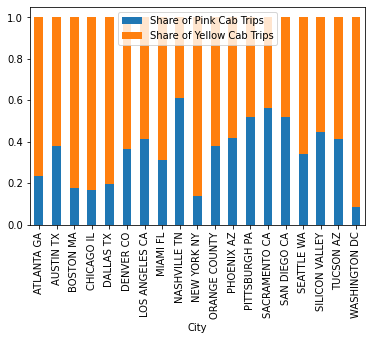

In [13]:
grouped_cab_data_counts[["Share of Pink Cab Trips", "Share of Yellow Cab Trips"]].plot.bar(stacked=True)

Looking at this chart, Pink Cab has highest share of taxi rides in **Nashville, Pittsburgh, Sacramento, and San Diego**, while Yellow Cab has highest share of Taxi rides in **Boston, Chicago, New York, and Washington**. Is this share related to the population of the city? i.e., does Yellow Cab have a higher share in larger or smaller cities?

In [14]:
grouped_cab_data_counts_merged = grouped_cab_data_counts.join(city_data)

grouped_cab_data_counts_merged

,Yellow Cab Trips,Pink Cab Trips,Trips,Share of Yellow Cab Trips,Share of Pink Cab Trips,Population,Users
City,,,,,,,
ATLANTA GA,5795,1762,7557,0.766839,0.233161,814885,24701
AUSTIN TX,3028,1868,4896,0.618464,0.381536,698371,14978
BOSTON MA,24506,5186,29692,0.825340,0.174660,248968,80021
CHICAGO IL,47264,9361,56625,0.834684,0.165316,1955130,164468
DALLAS TX,5637,1380,7017,0.803335,0.196665,942908,22157
DENVER CO,2431,1394,3825,0.635556,0.364444,754233,12421
LOS ANGELES CA,28168,19865,48033,0.586430,0.413570,1595037,144132
MIAMI FL,4452,2002,6454,0.689805,0.310195,1339155,17675
NASHVILLE TN,1169,1841,3010,0.388372,0.611628,327225,9270


<AxesSubplot:xlabel='Population', ylabel='Share of Yellow Cab Trips'>

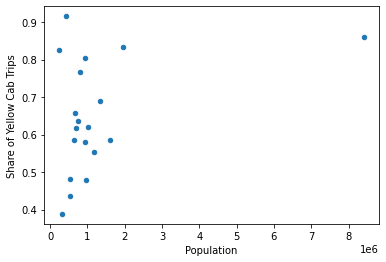

In [15]:
grouped_cab_data_counts_merged.plot.scatter("Population", "Share of Yellow Cab Trips")

<AxesSubplot:xlabel='Users', ylabel='Share of Yellow Cab Trips'>

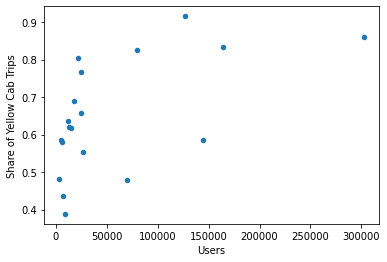

In [16]:
grouped_cab_data_counts_merged.plot.scatter("Users", "Share of Yellow Cab Trips")

There seems to be a positive correlation from the data above, meaning that **cities with higher population tend to have a higher share of Yellow Cab users.** However, to make the data more clear, it may help to transform the population/number of users logarithmically (base 10) to make a better linear fit, then do a linear regression analysis.

In [17]:
grouped_cab_data_counts_merged["log(Population)"] = grouped_cab_data_counts_merged["Population"].map(math.log10)
grouped_cab_data_counts_merged["log(Users)"] = grouped_cab_data_counts_merged["Users"].map(math.log10)

grouped_cab_data_counts_merged

,Yellow Cab Trips,Pink Cab Trips,Trips,Share of Yellow Cab Trips,Share of Pink Cab Trips,Population,Users,log(Population),log(Users)
City,,,,,,,,,
ATLANTA GA,5795,1762,7557,0.766839,0.233161,814885,24701,5.911096,4.392715
AUSTIN TX,3028,1868,4896,0.618464,0.381536,698371,14978,5.844086,4.175454
BOSTON MA,24506,5186,29692,0.825340,0.174660,248968,80021,5.396144,4.903204
CHICAGO IL,47264,9361,56625,0.834684,0.165316,1955130,164468,6.291176,5.216081
DALLAS TX,5637,1380,7017,0.803335,0.196665,942908,22157,5.974469,4.345511
DENVER CO,2431,1394,3825,0.635556,0.364444,754233,12421,5.877506,4.094157
LOS ANGELES CA,28168,19865,48033,0.586430,0.413570,1595037,144132,6.202771,5.158760
MIAMI FL,4452,2002,6454,0.689805,0.310195,1339155,17675,6.126831,4.247359
NASHVILLE TN,1169,1841,3010,0.388372,0.611628,327225,9270,5.514846,3.967080


<AxesSubplot:xlabel='log(Population)', ylabel='Share of Yellow Cab Trips'>

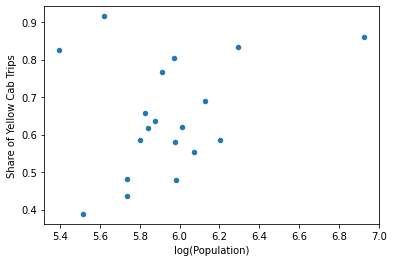

In [18]:
grouped_cab_data_counts_merged.plot.scatter("log(Population)", "Share of Yellow Cab Trips")

<AxesSubplot:xlabel='log(Users)', ylabel='Share of Yellow Cab Trips'>

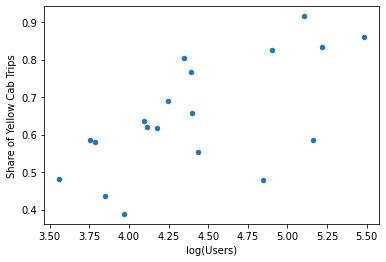

In [19]:
grouped_cab_data_counts_merged.plot.scatter("log(Users)", "Share of Yellow Cab Trips")

In [20]:
reg = linreg(fit_intercept=True)
reg.fit(grouped_cab_data_counts_merged[["log(Population)"]], grouped_cab_data_counts_merged["Share of Yellow Cab Trips"])

print(reg.intercept_)
print(reg.coef_)
print(reg.score(grouped_cab_data_counts_merged[["log(Population)"]], grouped_cab_data_counts_merged["Share of Yellow Cab Trips"]))

reg.fit(grouped_cab_data_counts_merged[["log(Users)"]], grouped_cab_data_counts_merged["Share of Yellow Cab Trips"])

print(reg.intercept_)
print(reg.coef_)
print(reg.score(grouped_cab_data_counts_merged[["log(Users)"]], grouped_cab_data_counts_merged["Share of Yellow Cab Trips"]))

-0.1562383215019344
[0.13551585]
0.08556598585809405
-0.13029161598304007
[0.17650398]
0.42026326251797486


The results above mean that the model predicting the share of Yellow Cab trips from the population of the city is:

$$
(Share \ of \ Yellow \ Cab \ Trips) = -0.15624 + 0.13551 \times \log(Population)
$$

with the $R^2$ correlation coefficient of 0.08557, indicating a rather weak relationship. This means the share of Yellow Cab trips **tends to increase by 13.551%** as the population increases tenfold. Looking at the plot, the low correlation coefficient could be explained by the outliers of Boston and Washington which have low populations but a high share of Pink Cab users.

The model predicting the share of Yellow Cab trips from the number of users in the city is:

$$
(Share \ of \ Yellow \ Cab \ Trips) = -0.13029 + 0.17650 \times \log(Population)
$$

with the $R^2$ correlation coefficient of 0.42026, indicating a fairly strong relationship. This means the share of Yellow Cab trips **tends to increase by 17.650%** as the number of users in the city increases tenfold.

Simply put, the larger the city, the larger the reach of Yellow Cab. To improve the model, one suggestion may be to quote the population of the corresponding **metropolitan statistical area (MSA)**, rather than the city proper. For example, while the population of New York city itself is about 8.4 million, the corresponding MSA has a much larger population of about 20 million (https://en.wikipedia.org/wiki/New_York_metropolitan_area).

## Profitability based on distance

Is there any relation between the distance traveled in a trip and:
* the cost of the trip;
* the price charged;
* or the profit margin?

Is there difference reflected by the company which run the trip? First we shall make some visualizations:

<AxesSubplot:xlabel='KM Travelled', ylabel='Cost of Trip'>

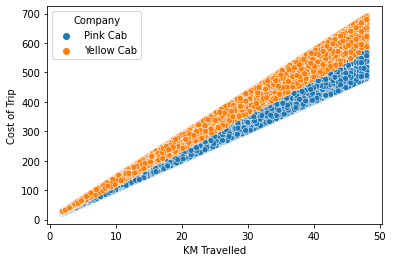

In [21]:
sns.scatterplot(data=cab_data, x="KM Travelled", y="Cost of Trip", hue="Company")

<AxesSubplot:xlabel='KM Travelled', ylabel='Price Charged'>

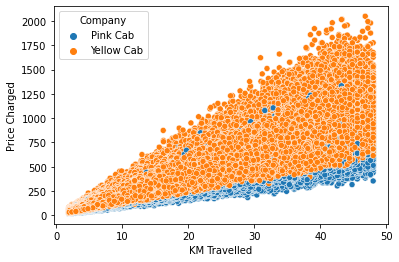

In [22]:
sns.scatterplot(data=cab_data, x="KM Travelled", y="Price Charged", hue="Company")

<AxesSubplot:xlabel='KM Travelled', ylabel='Profit Generated'>

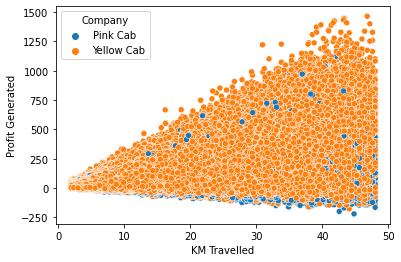

In [23]:
sns.scatterplot(data=cab_data, x="KM Travelled", y="Profit Generated", hue="Company")

While it is clear from visualizing the first two plots that Yellow Cab incurs more costs and charges more than Pink Cab, it is not yet clear what the effect on the profit is. In particular, there are many high outliers for Yellow Cab in terms of profit generated in the trip. One must also note that the data "fans out" for longer trips, i.e. becomes more varied with range approximately proportional to the distance, so it may be worth it to do another visualization, except the y-axis will plot the cost/price/profit *per KM Travelled*.

<AxesSubplot:xlabel='KM Travelled', ylabel='Profit/KM'>

c:\Users\rayng\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


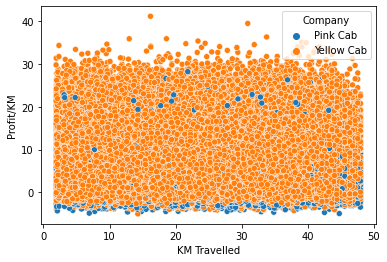

In [24]:
cab_data["Profit/KM"] = cab_data["Profit Generated"] / cab_data["KM Travelled"]

sns.scatterplot(data=cab_data, x="KM Travelled", y="Profit/KM", hue="Company")

As was predicted, the distribution of the profit made per KM in a trip is about the same. Therefore, the next analysis we are interested in, is how many trips have earned a profit in each range of profits, for each company? We will make a histogram to plot the profit per KM.

Pink Cab:

<AxesSubplot:>

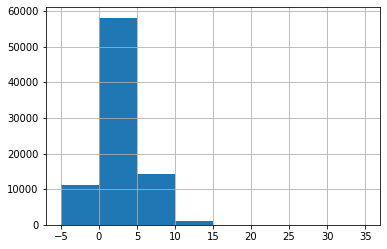

In [25]:
cab_data[cab_data["Company"] == "Pink Cab"]["Profit/KM"].hist(bins=[5 * n - 5 for n in range(9)])

Yellow Cab:

<AxesSubplot:>

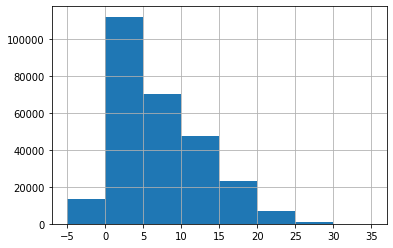

In [26]:
cab_data[cab_data["Company"] == "Yellow Cab"]["Profit/KM"].hist(bins=[5 * n - 5 for n in range(9)])

In both cases, a taxi trip was most likely to make a profit of under \\$5/KM, with some chance of making a loss. The chance of making larger profits per KM decreases, but this decrease is faster in Pink Cab than in Yellow Cab.

## Probability of net profit/net loss per trip

What proportion of trips for each company were losses?

In [27]:
cab_data["Loss"] = cab_data["Profit Generated"].map(lambda x: 1 if x < 0 else 0)
cab_data.groupby(["Company"])["Loss"].sum() / cab_data.groupby(["Company"])["Loss"].count()

Company
Pink Cab      0.131376
Yellow Cab    0.049840
Name: Loss, dtype: float64

This means that Pink Cab is **13.14\%** likely to make a loss, while Yellow cab is **4.98\%** likely to make a loss for any given trip.

We shall now do a regression analysis using `sklearn.linear_model.LinearRegression`. This will include adding a "dummy variable" for the company to assign 0 to a Pink Cab trip and 1 to a Yellow Cab trip. To account for company differences, we will also add an interaction term between Company and KM Travelled. The model is of the form:

$$
(Profit \ Generated (\$)) = \beta_0 + \beta_1(Company) + \beta_2(KM \ Travelled) + \beta_3(Company \times KM \ Travelled)
$$

As a result, we get two models using the formula for each cab company:

Pink Cab:
$$
(Profit \ Generated (\$)) = \beta_0 + \beta_2(KM \ Travelled)
$$

Yellow Cab:
$$
(Profit \ Generated (\$)) = (\beta_0 + \beta_1) + (\beta_2 + \beta_3)(KM \ Travelled)
$$

In [28]:
cab_data["Company2"] = cab_data["Company"].map(lambda x: 0 if x == "Pink Cab" else 1)
cab_data["Interaction"] = cab_data["KM Travelled"] * cab_data["Company2"]

reg = linreg(fit_intercept=True)
reg.fit(cab_data.dropna()[["Company2", "KM Travelled", "Interaction"]], cab_data.dropna()["Profit Generated"])

print(reg.intercept_)
print(reg.coef_)

-0.6944430460706883
[1.46716714 2.80792779 4.25856205]


The linear model we end up with for each company is:

Pink Cab:
$$
(Profit \ Generated (\$)) = -0.6944 + 2.8079(KM \ Travelled)
$$

Yellow Cab:
$$
(Profit \ Generated (\$)) = 0.7727 + 7.0665(KM \ Travelled)
$$

This means that on average, **Pink Cab tends to increase its profit by \$2.8079** for each KM travelled, while **Yellow Cab tends to increase its profit by \$7.0665** for each KM travelled.

## Seasonal effects/Annual trends

Is there a seasonal or time trending effect for each taxi company on the number of trips or revenue? We shall group each time by the month.

In [29]:
cab_data["Year"] = pd.DatetimeIndex(cab_data["Date of Travel"]).year.fillna(0).astype(int)
cab_data["Month"] = pd.DatetimeIndex(cab_data["Date of Travel"]).month.fillna(0).astype(int)

cab_data

,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Generated,Trips,Yellow Cab Trips,Pink Cab Trips,Profit/KM,Loss,Company2,Interaction,Year,Month
Transaction ID,,,,,,,,,,,,,,,,,,
10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1,0,1,1.882266,0,0,0.00,2016,1
10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,1,0,1,0.826904,0,0,0.00,2016,1
10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,1,0,1,3.049558,0,0,0.00,2016,1
10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,1,0,1,0.777751,0,0,0.00,2016,1
10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1,0,1,1.929439,0,0,0.00,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440104,53286,Cash,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,1,1,0,0.821667,0,1,8.40,2018,1
10440105,52265,Cash,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,1,1,0,3.150270,0,1,27.75,2018,1
10440106,52175,Card,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,1,1,0,3.652500,0,1,8.80,2018,1


In [30]:
monthly_summary = cab_data.groupby(["Year", "Month", "Company"], sort=True)["KM Travelled", "Profit Generated"].sum()

pd.set_option("display.max_rows", None)
monthly_summary.round(2)

C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\78055483.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_summary = cab_data.groupby(["Year", "Month", "Company"], sort=True)["KM Travelled", "Profit Generated"].sum()


KM Travelled  Profit Generated
Year Month Company                                   
2016 1     Pink Cab        21018.83          73952.86
           Yellow Cab      84603.65         836308.11
     2     Pink Cab        23419.84          87475.54
           Yellow Cab     105302.33        1009169.17
     3     Pink Cab        27893.78          87801.18
           Yellow Cab     117491.88         914764.78
     4     Pink Cab        27357.38          82591.85
           Yellow Cab     121806.35         946136.42
     5     Pink Cab        35137.83          61550.96
           Yellow Cab     133638.34        1282773.41
     6     Pink Cab        39249.44          71103.25
           Yellow Cab     127772.79        1250891.96
     7     Pink Cab        48469.86         105912.74
           Yellow Cab     154936.28        1024754.92
     8     Pink Cab        51257.16         131573.36
           Yellow Cab     156646.52         850119.96
     9     Pink Cab        63438.63         143889.42
           Yellow Cab     183306.67        1322872.73
     10    Pink Cab        74035.94         240114.86
           Yellow Cab     217941.82        1373258.77
     11    Pink Cab        72624.22         285591.89
           Yellow Cab     211730.01        1440007.07
     12    Pink Cab        79606.76         341953.30
           Yellow Cab     244801.57        1675938.13
2017 1     Pink Cab        38661.06         149917.00
           Yellow Cab     148397.09        1261753.18
     2     Pink Cab        27302.50          91900.70
           Yellow Cab     120091.99        1097924.78
     3     Pink Cab        34868.64         117105.30
           Yellow Cab     139956.18        1243013.36
     4     Pink Cab        33507.22          91987.85
           Yellow Cab     142385.06        1220955.45
     5     Pink Cab        38502.95          63429.02
           Yellow Cab     146463.89        1497737.16
     6     Pink Cab        47940.07         101300.48
           Yellow Cab     148996.53        1205511.46
     7     Pink Cab        52470.57         117348.38
           Yellow Cab     168381.08        1040900.57
     8     Pink Cab        62887.78         142924.01
           Yellow Cab     190051.30        1119152.18
     9     Pink Cab        80071.62         205922.96
           Yellow Cab     224358.91        1600705.81
     10    Pink Cab        86046.70         264328.24
           Yellow Cab     244693.00        1603496.69
     11    Pink Cab        86926.08         285396.55
           Yellow Cab     251103.37        1752380.90
     12    Pink Cab        96638.33         402094.41
           Yellow Cab     290000.62        1932446.43
2018 1     Pink Cab        54060.60         164184.74
           Yellow Cab     179046.51        1260374.44
     2     Pink Cab        25488.49          72665.06
           Yellow Cab     110785.34         868884.78
     3     Pink Cab        34318.50          94190.09
           Yellow Cab     136112.83         993436.71
     4     Pink Cab        31015.55          71238.40
           Yellow Cab     127630.66         908450.98
     5     Pink Cab        37852.06          43633.93
           Yellow Cab     141456.82        1203033.00
     6     Pink Cab        46388.44          60311.50
           Yellow Cab     148001.74        1123935.04
     7     Pink Cab        47365.12          78623.98
           Yellow Cab     155109.38         795906.20
     8     Pink Cab        60050.53         113753.92
           Yellow Cab     185295.09         886998.74
     9     Pink Cab        73781.18         144622.94
           Yellow Cab     203866.81        1218803.92
     10    Pink Cab        77843.75         191993.97
           Yellow Cab     219188.85        1273756.25
     11    Pink Cab        88348.37         239337.73
           Yellow Cab     252971.65        1416933.33
     12    Pink Cab        85227.33         285605.93
           Yellow Cab     265094.56        1566886.39

<AxesSubplot:xlabel='Year,Month'>

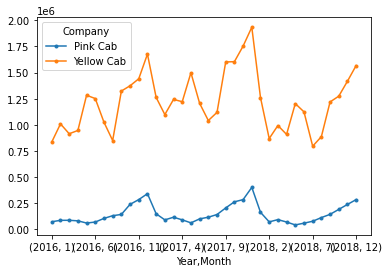

In [31]:
monthly_summary["Profit Generated"].unstack().plot(style=".-")

<AxesSubplot:xlabel='Year,Month'>

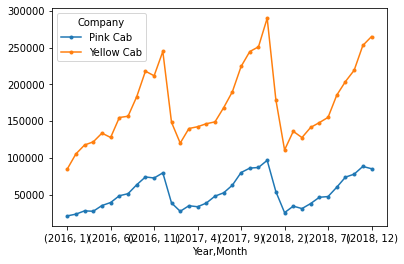

In [32]:
monthly_summary["KM Travelled"].unstack().plot(style=".-")

From this time-series plot, we cannot see any long-term trend in the data, although total profit generated seems higher in 2017 than in 2016 and 2018. However, we see a seasonal effect. This time we shall group by month only, looking at the total profit and mileage for each company over the three year period.

In [33]:
by_month_summary = cab_data.groupby(["Month", "Company"], sort=True)["KM Travelled", "Profit Generated"].sum()

by_month_summary

C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\2423099037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  by_month_summary = cab_data.groupby(["Month", "Company"], sort=True)["KM Travelled", "Profit Generated"].sum()


KM Travelled  Profit Generated
Month Company                                   
1     Pink Cab       113740.49      3.880546e+05
      Yellow Cab     412047.25      3.358436e+06
2     Pink Cab        76210.83      2.520413e+05
      Yellow Cab     336179.66      2.975979e+06
3     Pink Cab        97080.92      2.990966e+05
      Yellow Cab     393560.89      3.151215e+06
4     Pink Cab        91880.15      2.458181e+05
      Yellow Cab     391822.07      3.075543e+06
5     Pink Cab       111492.84      1.686139e+05
      Yellow Cab     421559.05      3.983544e+06
6     Pink Cab       133577.95      2.327152e+05
      Yellow Cab     424771.06      3.580338e+06
7     Pink Cab       148305.55      3.018851e+05
      Yellow Cab     478426.74      2.861562e+06
8     Pink Cab       174195.47      3.882513e+05
      Yellow Cab     531992.91      2.856271e+06
9     Pink Cab       217291.43      4.944353e+05
      Yellow Cab     611532.39      4.142382e+06
10    Pink Cab       237926.39      6.964371e+05
      Yellow Cab     681823.67      4.250512e+06
11    Pink Cab       247898.67      8.103262e+05
      Yellow Cab     715805.03      4.609321e+06
12    Pink Cab       261472.42      1.029654e+06
      Yellow Cab     799896.75      5.175271e+06

<AxesSubplot:xlabel='Month'>

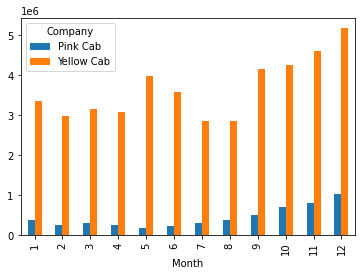

In [34]:
by_month_summary["Profit Generated"].unstack().plot.bar()

<AxesSubplot:xlabel='Month'>

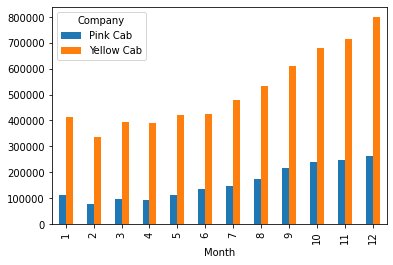

In [35]:
by_month_summary["KM Travelled"].unstack().plot.bar()

From this analysis, we see that profit is **higher during the later months of the year (highest in October, November, December).** The same could be said about total mileage, where the later in the year, the more miles driven by both companies.

## Customer demographics

The next question we are interested in is, which customer groups tend to use which company's rides more in each city? We will use several analyses:
* group by age group (in decades of age, 20-29, 30-39, etc.) and city
* group by gender and city
* group by socio-economic status and city

First, create a table showing the total mileage, money spent, etc. for each customer in the list.

In [36]:
customer_data["Age Group"] = customer_data["Age"].map(lambda x: (x//10) * 10)
customer_data["Income Bracket"] = customer_data["Income (USD/Month)"].map(lambda x: min((x//2000),20) * 2000)

pd.reset_option("all")
customer_data

c:\Users\rayng\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\_config\config.py:653: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
c:\Users\rayng\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\_config\config.py:653: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


,Gender,Age,Income (USD/Month),Age Group,Income Bracket
Customer ID,,,,,
29290,Male,28,10813,20,10000
27703,Male,27,9237,20,8000
28712,Male,53,11242,50,10000
28020,Male,23,23327,20,22000
27182,Male,33,8536,30,8000
...,...,...,...,...,...
12490,Male,33,18713,30,18000
14971,Male,30,15346,30,14000
41414,Male,38,3960,30,2000


In [37]:
customer_totals = cab_data.groupby(["Company", "Customer ID"])["KM Travelled", "Price Charged", "Cost of Trip", "Profit Generated"].sum()
customer_summary = customer_data.join(customer_totals)

customer_summary

C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\4152274607.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_totals = cab_data.groupby(["Company", "Customer ID"])["KM Travelled", "Price Charged", "Cost of Trip", "Profit Generated"].sum()


Gender  Age  Income (USD/Month)  Age Group  \
Company    Customer ID                                               
Pink Cab   1              Male   36               16359         30   
           2              Male   31               12069         30   
           3            Female   27               12968         20   
           4              Male   33               13803         30   
           5              Male   24                9965         20   
...                        ...  ...                 ...        ...   
Yellow Cab 59996          Male   51               16634         50   
           59997          Male   63               22352         60   
           59998        Female   23                5678         20   
           59999          Male   38               24577         30   
           60000        Female   27               20303         20   

                        Income Bracket  KM Travelled  Price Charged  \
Company    Customer ID                                                
Pink Cab   1                     16000        125.52        2286.48   
           2                     12000         96.28        1594.71   
           3                     12000        191.70        2854.62   
           4                     12000         38.15         562.64   
           5                      8000        153.05        2272.70   
...                                ...           ...            ...   
Yellow Cab 59996                 16000         61.72         805.43   
           59997                 22000        206.63        3117.21   
           59998                  4000        135.68        2262.13   
           59999                 24000        113.15        1751.19   
           60000                 20000        279.09        4728.94   

                        Cost of Trip  Profit Generated  
Company    Customer ID                                  
Pink Cab   1               1413.3160          873.1640  
           2                994.3000          600.4100  
           3               2188.5330          666.0870  
           4                385.3150          177.3250  
           5               1695.5230          577.1770  
...                              ...               ...  
Yellow Cab 59996            829.7136          -24.2836  
           59997           2741.4636          375.7464  
           59998           1810.3092          451.8208  
           59999           1467.7668          283.4232  
           60000           3659.7612         1069.1788  

[72226 rows x 9 columns]

In [38]:
trip_counts_pink = cab_data[cab_data["Company"] == "Pink Cab"].groupby(["Customer ID"]).count()["Trips"]
trip_counts_yellow = cab_data[cab_data["Company"] == "Yellow Cab"].groupby(["Customer ID"]).count()["Trips"]

In [39]:
trip_counts_pink

Customer ID
1        4
2        4
3        6
4        1
5        8
        ..
59995    2
59997    2
59998    3
59999    2
60000    4
Name: Trips, Length: 32330, dtype: int64

In [40]:
trip_counts_yellow

Customer ID
1        25
2        36
3        40
4        25
5        23
         ..
59996     4
59997     8
59998     6
59999     6
60000    14
Name: Trips, Length: 39896, dtype: int64

In [41]:
customer_data["Pink Cab Trips"] = trip_counts_pink
customer_data["Yellow Cab Trips"] = trip_counts_yellow

customer_data = customer_data.fillna(0)

customer_data

,Gender,Age,Income (USD/Month),Age Group,Income Bracket,Pink Cab Trips,Yellow Cab Trips
Customer ID,,,,,,,
29290,Male,28,10813,20,10000,1.0,2.0
27703,Male,27,9237,20,8000,2.0,2.0
28712,Male,53,11242,50,10000,1.0,3.0
28020,Male,23,23327,20,22000,3.0,1.0
27182,Male,33,8536,30,8000,1.0,3.0
...,...,...,...,...,...,...,...
12490,Male,33,18713,30,18000,0.0,1.0
14971,Male,30,15346,30,14000,0.0,0.0
41414,Male,38,3960,30,2000,0.0,1.0


In [42]:
customer_data.groupby("Income Bracket")["Pink Cab Trips", "Yellow Cab Trips"].mean()

C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\3280618199.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_data.groupby("Income Bracket")["Pink Cab Trips", "Yellow Cab Trips"].mean()


,Pink Cab Trips,Yellow Cab Trips
Income Bracket,,
2000,1.718916,5.512028
4000,1.695586,5.375788
6000,1.690899,5.484744
8000,1.719808,5.616220
10000,1.708824,5.719519
12000,1.749238,5.833333
14000,1.730739,5.521660
16000,1.718226,5.761021
18000,1.738462,5.529596


C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\1298658982.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_data.groupby("Income Bracket")["Pink Cab Trips", "Yellow Cab Trips"].mean().plot.bar(stacked=True)


<AxesSubplot:xlabel='Income Bracket'>

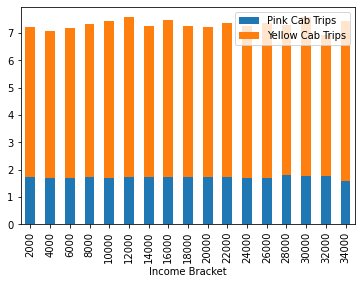

In [43]:
customer_data.groupby("Income Bracket")["Pink Cab Trips", "Yellow Cab Trips"].mean().plot.bar(stacked=True)

The summary above shows that the average frequency of usage for each company is **approximately the same across all income groups.**

In [44]:
customer_data.groupby("Age Group")["Pink Cab Trips", "Yellow Cab Trips"].mean()

C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\3390534839.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_data.groupby("Age Group")["Pink Cab Trips", "Yellow Cab Trips"].mean()


,Pink Cab Trips,Yellow Cab Trips
Age Group,,
10,1.766388,5.443445
20,1.738938,5.631449
30,1.695102,5.541241
40,1.725221,5.695391
50,1.716581,5.567221
60,1.741180,5.534638


C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\1267354285.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_data.groupby("Age Group")["Pink Cab Trips", "Yellow Cab Trips"].mean().plot.bar(stacked=True)


<AxesSubplot:xlabel='Age Group'>

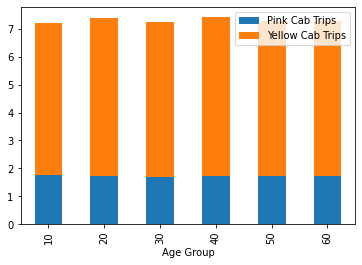

In [45]:
customer_data.groupby("Age Group")["Pink Cab Trips", "Yellow Cab Trips"].mean().plot.bar(stacked=True)

In [46]:
customer_data.groupby("Gender")["Pink Cab Trips", "Yellow Cab Trips"].mean()

C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\114137487.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_data.groupby("Gender")["Pink Cab Trips", "Yellow Cab Trips"].mean()


,Pink Cab Trips,Yellow Cab Trips
Gender,,
Female,1.657747,5.130700
Male,1.778142,5.973985


C:\Users\rayng\AppData\Local\Temp\ipykernel_7956\1250504666.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_data.groupby("Gender")["Pink Cab Trips", "Yellow Cab Trips"].mean().plot.bar(stacked=True)


<AxesSubplot:xlabel='Gender'>

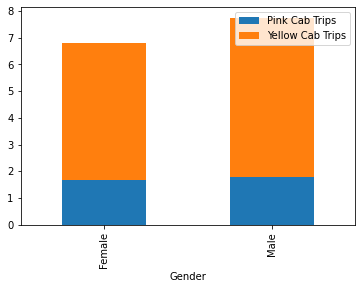

In [47]:
customer_data.groupby("Gender")["Pink Cab Trips", "Yellow Cab Trips"].mean().plot.bar(stacked=True)

There is very little effect of the age group and income level of the customer on the frequency of usage of both cabs. However, we see that men tend to use the taxis slightly more frequently. It is also clear from all of these analyses that **the number of Yellow Cab trips per customer is about three times as much as the number of Pink Cab trips.**

## Conclusion

To summarize the points that we have found from this analysis:
* On a per trip basis, Yellow Cab makes more profit compared to Pink Cab.
* In all but one city, Yellow Cab makes up a higher proportion of the trips compared to Pink Cab.
* Cities with higher population/number of users tend to have a higher share of Yellow Cab trips, giving Yellow Cab an even larger reach in large cities.
* Yellow Cab is less likely to make a loss in any trip.
* Yellow Cab tends to make \$4.2586/KM more than Pink Cab on a per km basis.
* Profit is higher in the later months of the year.
* Without much relation with age and socio-economic status, customers tend to be on average about three times more active using Yellow Cab compared to Pink Cab.
* Men tend to use the cabs more often than women.

Based on these points, we have ample evidence to say that Yellow Cab is the better choice of investment for Company XYZ for better profits and reach.